In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df1 = pd.read_csv(r"C:\Users\wilsen\OneDrive\Desktop\anime\60k_anime_data.csv")
df2 = pd.read_csv(r"C:\Users\wilsen\OneDrive\Desktop\anime\64492k_anime_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\wilsen\\OneDrive\\Desktop\\anime\\60k_anime_data.csv'

In [ ]:
df2

In [ ]:
len(df1)

27670

In [ ]:
len(df2)

1483

In [ ]:
df = pd.concat([df1,df2])

In [ ]:

df["episodes"] = df["episodes"].fillna(0)


In [ ]:
anime_dtype = {
            #titiles
            "title": "string",
            "title_english": "string",
            "title_japanese": "string",
            "image" : "string",
            
            # aired
            "aired_from": "string",
            "aired_to": "string",
            
            # episode status
            "synopsis": "string",
            "status": "string",
            "episodes": "int",
            
            #popularity
            "rating": "string",
            "rank": "int",
            "popularity": "int",
            "members": "int",
            "favorites": "int",
            "score": "float",
            "scored_by": "int",
            
            # features
            "genres": "string",
            "themes": "string",
            "demographics": "string"
        }

In [ ]:
df["aired_from"] = pd.to_datetime(df["aired_from"],errors='coerce')
df["aired_to"] = pd.to_datetime(df["aired_to"],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29153 entries, 0 to 1482
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   title           29153 non-null  object             
 1   title_english   12475 non-null  object             
 2   title_japanese  28931 non-null  object             
 3   image           29153 non-null  object             
 4   aired_from      4123 non-null   datetime64[ns, UTC]
 5   aired_to        2107 non-null   datetime64[ns, UTC]
 6   synopsis        23970 non-null  object             
 7   status          29153 non-null  object             
 8   episodes        29153 non-null  float64            
 9   rating          28467 non-null  object             
 10  rank            22361 non-null  float64            
 11  popularity      29153 non-null  int64              
 12  members         29153 non-null  int64              
 13  favorites       29153 non-null  int64

In [ ]:
df

In [ ]:
df["genres"] = df["genres"].str.replace(r"[\[\]\']", "", regex=True)
df["themes"] = df["themes"].str.replace(r"[\[\]\']", "", regex=True)
df["demographics"] = df["demographics"].str.replace(r"[\[\]\']", "", regex=True)


In [ ]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,"Crime is timeless. By the year 2071, humanity ...",Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaT,"Another day, another bounty—such is the life o...",Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,"Vash the Stampede is the man with a $$60,000,0...",Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,"Though hidden away from the general public, Wi...",Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Ibitte Konai Gibo to Gishi,My Mother-in-Law and Sister-in-Law Who Don't B...,いびってこない義母と義姉,https://cdn.myanimelist.net/images/anime/1272/...,2026-01-01 00:00:00+00:00,NaT,Miya is the illegitimate child of a certain pr...,Not yet aired,0.0,NaN,NaN,21905,214,0,NaN,NaN,Comedy,Historical,NaN
1479,DJ Pikachu Full Set,NaN,NaN,https://cdn.myanimelist.net/images/anime/1755/...,2025-07-22 00:00:00+00:00,NaT,Get Ready for Pokemon Presents with DJ Pikachu!,Finished Airing,1.0,NaN,0.0,0,0,0,NaN,NaN,NaN,Music,Kids
1480,Wanted,NaN,WANTED,https://cdn.myanimelist.net/images/anime/1504/...,2016-01-01 00:00:00+00:00,NaT,"Graduate Work 2016 by Mai Shizuse, Osaka Colle...",Finished Airing,1.0,G - All Ages,15688.0,28656,0,0,NaN,NaN,"Action, Fantasy",NaN,NaN
1481,Kanojo ga Separate o Matou Riyuu,NaN,彼女がセパレートをまとう理由,https://cdn.myanimelist.net/images/anime/1360/...,2025-04-07 00:00:00+00:00,NaT,"Amane Kojou, a virgin girl frustrated with her...",Currently Airing,0.0,Rx - Hentai,NaN,28656,3,0,NaN,NaN,Hentai,NaN,NaN


In [ ]:
df.sort_values(by="rank",ascending=True)

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
1482,Yuanshen: Song of the night star,Genshin Impact: Song of the night star,【原神】ナイトスターの歌,https://cdn.myanimelist.net/img/sp/icon/apple-...,2025-07-22 00:00:00+00:00,NaT,Promotional video showcasing the Nod Krai cast...,Finished Airing,1.0,PG-13 - Teens 13 or older,0.0,0,0,0,NaN,NaN,"Adventure, Fantasy",Isekai,NaN
26634,Mo-Mo-Momoko!,NaN,NaN,https://cdn.myanimelist.net/img/sp/icon/apple-...,NaT,NaT,NaN,Finished Airing,1.0,NaN,0.0,0,0,0,NaN,NaN,NaN,"Anthropomorphic, Gag Humor",NaN
26635,Concert Report,NaN,NaN,https://cdn.myanimelist.net/img/sp/icon/apple-...,NaT,NaT,"Animator Suko, Onkun attends a TWICE concert.",Finished Airing,1.0,G - All Ages,0.0,0,0,0,NaN,NaN,NaN,"Gag Humor, Idols (Female)",NaN
26636,O Panchu Usagi Songu,NaN,おぱんちゅうさぎソング,https://cdn.myanimelist.net/img/sp/icon/apple-...,NaT,NaT,This was played at the Opanchu Usagi Cafe! !\n...,Finished Airing,1.0,G - All Ages,0.0,0,0,0,NaN,NaN,NaN,"Anthropomorphic, Gag Humor",NaN
26638,2023 Paper-fortune Report,2023 Paper-fortune Report,しんみ けんじ さん; 한신영 さん,https://cdn.myanimelist.net/img/sp/icon/apple-...,NaT,NaT,NaN,Finished Airing,1.0,G - All Ages,0.0,0,0,0,NaN,NaN,NaN,Gag Humor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,Nanmono Ii jan,NaN,なんものいいじゃん,https://cdn.myanimelist.net/images/anime/1967/...,2024-07-12 00:00:00+00:00,NaT,Music video for the song Nanmono Ii jan by Nan...,Finished Airing,1.0,G - All Ages,NaN,28434,60,0,NaN,NaN,NaN,"Anthropomorphic, Music",NaN
1476,Hirayasumi,NaN,ひらやすみ,https://cdn.myanimelist.net/images/anime/1344/...,NaT,NaT,"Living in Asagaya, 29-year-old Hiroto Ikuta sp...",Not yet aired,0.0,NaN,NaN,16340,643,1,NaN,NaN,Slice of Life,Adult Cast,Seinen
1477,"Issho tte, Ii ne.",NaN,いっしょって、いいね。,https://cdn.myanimelist.net/images/anime/1308/...,2025-06-02 00:00:00+00:00,NaT,A promotional video by Urachan for the Japanes...,Finished Airing,1.0,G - All Ages,NaN,28654,22,0,NaN,NaN,Slice of Life,NaN,NaN
1478,Ibitte Konai Gibo to Gishi,My Mother-in-Law and Sister-in-Law Who Don't B...,いびってこない義母と義姉,https://cdn.myanimelist.net/images/anime/1272/...,2026-01-01 00:00:00+00:00,NaT,Miya is the illegitimate child of a certain pr...,Not yet aired,0.0,NaN,NaN,21905,214,0,NaN,NaN,Comedy,Historical,NaN


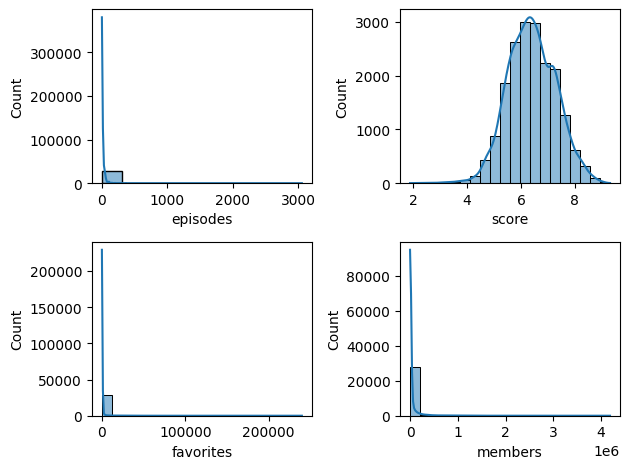

In [ ]:
plt.subplot(2,2,1)
sns.histplot(df["episodes"],kde=True,bins=10)

plt.subplot(2,2,2)
sns.histplot(df["score"],kde=True,bins=20)

plt.subplot(2,2,3)
sns.histplot(df["favorites"],kde=True,bins=20)

plt.subplot(2,2,4)
sns.histplot(df["members"],kde=True,bins=20)

plt.tight_layout()


In [ ]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,"Crime is timeless. By the year 2071, humanity ...",Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaT,"Another day, another bounty—such is the life o...",Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,"Vash the Stampede is the man with a $$60,000,0...",Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,"Though hidden away from the general public, Wi...",Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Ibitte Konai Gibo to Gishi,My Mother-in-Law and Sister-in-Law Who Don't B...,いびってこない義母と義姉,https://cdn.myanimelist.net/images/anime/1272/...,2026-01-01 00:00:00+00:00,NaT,Miya is the illegitimate child of a certain pr...,Not yet aired,0.0,NaN,NaN,21905,214,0,NaN,NaN,Comedy,Historical,NaN
1479,DJ Pikachu Full Set,NaN,NaN,https://cdn.myanimelist.net/images/anime/1755/...,2025-07-22 00:00:00+00:00,NaT,Get Ready for Pokemon Presents with DJ Pikachu!,Finished Airing,1.0,NaN,0.0,0,0,0,NaN,NaN,NaN,Music,Kids
1480,Wanted,NaN,WANTED,https://cdn.myanimelist.net/images/anime/1504/...,2016-01-01 00:00:00+00:00,NaT,"Graduate Work 2016 by Mai Shizuse, Osaka Colle...",Finished Airing,1.0,G - All Ages,15688.0,28656,0,0,NaN,NaN,"Action, Fantasy",NaN,NaN
1481,Kanojo ga Separate o Matou Riyuu,NaN,彼女がセパレートをまとう理由,https://cdn.myanimelist.net/images/anime/1360/...,2025-04-07 00:00:00+00:00,NaT,"Amane Kojou, a virgin girl frustrated with her...",Currently Airing,0.0,Rx - Hentai,NaN,28656,3,0,NaN,NaN,Hentai,NaN,NaN


In [ ]:
df.to_csv(r"C:\Users\wilsen\OneDrive\Desktop\anime\612312231231235k_anime_data.csv",index=False)